<a href="https://colab.research.google.com/github/mario-i-caicedo-ai/Aprendizaje-Automatico-Machine-Learning-/blob/main/fit_line.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b><center>Introducción al Aprendizaje Automático</center></b></h1>
<h1><b><center>Primer Ejemplo</center></b></h1>


<h2><center>Mario I. Caicedo</center></h2>


### **Regresión Lineal** ó **Ajuste de una recta**

El problema de regresión lineal, probablemente el problema más sencillo de **aprendizaje supervisado** consiste en encontrar los parámetros (pendiente e intercepto de una recta) que permitan hacer la mejor predicción (extrapolación) posible a datos que provengan de dos atributos que se visualizan alineados en un gráfico cruzado.  

Este es un problema totalmente resuelto en estadística clásica, lo que de ninura manera disminuye el interés que pueda despertar y es por ello que este cuaderno describe su solución de manera exhaustiva. 

### **Bibliotecas**

In [1]:
import numpy as np
import scipy 
import pandas as pd

from scipy import stats
from scipy import linalg

import sklearn

from sklearn.linear_model import LinearRegression

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


import matplotlib as plt
import matplotlib.pyplot as plt

# **Introducción**

* En la notación estándar de *problemas inversos*, se tienen $N$ **mediciones (datos)** $d^{(i)}$, dependientes de un conjunto de variables $f^{i}$ y parámetros $m$ y $n$ en la forma,

$$\boxed{d^{(i)}=m\,f^{(i)}+n+\varepsilon^{(i)}\,,\qquad\,i=1,2,...,N}$$

* Los valores $\varepsilon^{(i)}$ son las incertdumbres en las mediciones de tiempo y posición

* En la notación estándar de estadística y ML (ver Andrew Ng) 

$$\boxed{y^{(i)}=h_{\Theta}(x^{(i)})=\theta_0+\theta_1\,f^{(i)}+\varepsilon^{(i)}}$$
donde $h_\Theta$ es la *hipótesis*

* Las relaciones entre las mediciones y los parámetros se pueden reescribir en la forma

$$\boxed{\mathbf{d}=\mathbf{Fm}}$$

$$\boxed{y^{(i)}=h_\Theta(x^{(i)})}$$

$$\boxed{\mathbf{y}=\mathbf{F\Theta}}$$

* Donde $\mathbf{d}$ es el vector de los datos (de $N$ entradas), $\mathbf{F}$ una matriz $N\times{}2$ y

$$\Theta=\mathbf{m}=\begin{pmatrix}n\\m\end{pmatrix}=\begin{pmatrix}\theta_0\\\theta_1\end{pmatrix}$$

* **El problema de ajuste (ó *aprendizaje*) consiste en encontrar el vector de parámetros $\Theta$**

* Una vez que se alcanza el aprendizaje, se pueden usar los parámetros y la hipótesis para llevar a cabo predecciones (extrapolaciones)  

* Para resolver el problema se introduce un problema de minimización.

* La función de costo (error cuadrático medio) es:

$$J(\mathbf{m})=(\mathbf{d}-\mathbf{Fm})^T(\mathbf{d}-\mathbf{Fm})$$

* La solución al problema de aprendizaje se reduce a  minimizar la función de costo con respecto a lo parámetos.

* Se puede encontrar una solución directa buscando los puntos críticos de $J$, esto es, resolviendo

$$\nabla_{\mathbf{m}}J=0\,,$$
que resulta en
$$\boxed{\mathbf{m}=(\mathbf{F}^T\mathbf{F})^{-1}\,\mathbf{F}^TX}$$

* Esta solución explítica requiere el cálculo de la inversa de la matriz $\mathbf{F}^T\mathbf{F}$ que en este caso es un problema casi trivial, pero que en el caso de un modelo lineal con $p$ parámetros puede complicarse por un conjunto de problemas bien conocidos en la subdisciplina del álgebra lineal numérica como por ejemplo
    * Largos tiempos de cálculo para problemas muy grandes y
    * Mal condicionamiento de la matriz $\mathbf{F}^T\mathbf{F}$

* El problema de aprendizaje también puede resolverse minimizando la función de costo a través de la técnica de **Descenso por Gradiente**.


# En este cuaderno resolveremos el problema de aprendizaje con un conjunto único de **datos sintéticos**.

* Los datos sintéticos corresponden a un movimiento de velocidad constante
* $x(t)=v_0\,t+x_0$

# Creando los datos sintéticos

### La función hipotesis calcula los valores de x(t) a partir de una lista de tiempos generada con linspace.

In [2]:
def hipotesis(t,Theta,porcentaje_ruido):
  np.random.seed(42)
  factor=porcentaje_ruido/100
  noise=factor*np.random.normal(size=21)
  h=Theta[0]+Theta[1]*t+noise
  return(h)

### Creando y visualizando los datos sintéticos

In [3]:
t=np.linspace(0,10,21)
v0=0.5
x0=1.

Theta=np.zeros(2)
Theta[0]=x0
Theta[1]=v0

porcentaje_ruido=10.

x=hipotesis(t,Theta,porcentaje_ruido)

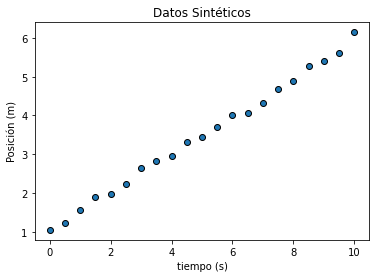

In [4]:
fig, dx = plt.subplots()
dx.scatter(t, x, edgecolors=(0, 0, 0))

plt.title('Datos Sintéticos')
dx.set_xlabel('tiempo (s)')
dx.set_ylabel('Posición (m)')
plt.show()

# **Parte I**

### Soluciones sin recurrir a bibliotecas

# Primer ajuste

## Solución analítica

* Recordar que $\mathbf{F}$ es la matriz de tiempos


### Construcción y Transposición de

$$\mathbf{F}=\begin{pmatrix}1&t^{(1)}\\
1&t^{(2)}\\\vdots&\vdots\\1&t^{(N)}\end{pmatrix}$$

### Cálculo de $$\mathbf{F}^T\mathbf{F}$$
 



In [5]:
F=np.zeros((21,2))

for p in range(0,21):
  F[p,0]=1.
  F[p,1]=t[p]

FT=F.T # Transposición de M
FTF= FT.dot(F)

### Solución (aprendizaje) analítica/directa

$$\boxed{\boldsymbol{\Theta}=(\mathbf{F}^T\mathbf{F})^{-1}\,\mathbf{F}^TX}$$

* En este caso $\mathbf{F}$ es una matriz $2\times{}2$ simétrica y el cálculo de su inversa es elemental,
$$
\begin{pmatrix}
a&b\\
b&d
\end{pmatrix}^{-1}=\frac{1}{\Delta}\begin{pmatrix}
d&-b\\
-b&a
\end{pmatrix}\,,
$$
donde $\Delta$ el determinante tiene valor
$$
\Delta=ad-b^2$$

In [6]:
# Calculando la inversa de F^TF

FTF_inv=np.empty_like(FTF)

FTF_inv[0,0]=FTF[1,1]
FTF_inv[0,1]=-FTF[0,1]
FTF_inv[1,0]=-FTF[1,0]
FTF_inv[1,1]=FTF[0,0]
DELTA=FTF_inv[0,0]*FTF_inv[1,1]-FTF_inv[0,1]*FTF_inv[1,0]
DELTA=1./DELTA
FTF_inv=DELTA*FTF_inv


* El sistema a resolver es:
$$
\mathbf{F}^T\mathbf{F}=\mathbf{F}^T\mathbf{X}
$$

In [7]:
G=FT.dot(x) # Lado derecho del sistema

model_hand=FTF_inv.dot(G) # Solución 

# Solución uando linalg
# Linalg usa técnicas avanzadas de álgebra lineal numeŕica
# para resolver el sistema de ecuaciones, su uso es totalmente innecesario 
# en este caso pero se incluye para propóistos pedagógicos.

model=linalg.inv(FTF).dot(G)

In [24]:
print('Pendiente del Modelo Sintético:',Theta[1],'\n')

print('Intercepto del Modelo Sintético:',Theta[0],'\n')### Salida

print('Aprendizaje por via de la Solución Analítica\n')

print('Pendiente:',model_hand[1],'\n')

print('Intercepto:',model_hand[0],'\n')

print('Aprendizaje por via de la Solución Analítica usando linalg\n')

print('Pendiente:',model[1],'\n')

print('Intercepto:',model[0])

Pendiente del Modelo Sintético: 0.5 

Intercepto del Modelo Sintético: 1.0 

Aprendizaje por via de la Solución Analítica

Pendiente: 0.4870542622470567 

Intercepto: 1.0553938199079762 

Aprendizaje por via de la Solución Analítica usando linalg

Pendiente: 0.48705426224705717 

Intercepto: 1.055393819907976


# Segundo Ajuste 

## Aprendizaje por método de gradiente

* Comenzamos por recordar y calcular la función de costo (será necesaria en el criterio de parada del algoritmo)

$$J(\boldsymbol{\Theta})=(\mathbf{d}-\mathbf{F}\boldsymbol{\Theta})^T(\mathbf{d}-\mathbf{Fm})$$

In [9]:
def Cost(d,t,Theta,porcentaje_ruido):
  N=2.*float(len(t))
  s=d-hipotesis(t,Theta,porcentaje_ruido)
  c=s.dot(s.T)/N
  return(c)

* El gradiente de $J$ se calcula de inmediato 

$$\nabla_{\boldsymbol{\Theta}^T}J(\boldsymbol{\Theta})=-\mathbf{F}^T(\mathbf{d}-\mathbf{F}\boldsymbol{\Theta})$$

In [10]:
def grad(d,F,Theta):
  M=F.T
  s=d-F.dot(Theta)
  gr=-M.dot(s)/float(len(d))
  return(gr)

### Función para el **Algoritmo de Descenso por Gradiente**

* El algoritmo comienza dando una semilla (valor inicial) $\boldsymbol{\Theta}^{(0)}$

* A partir de la semilla se itera (el superíndice k indica la iteración) para conseguir nuevos valores de los parámetros

$$\boldsymbol{\Theta}^{(k+1)}=\boldsymbol{\Theta}^{(k)}-\mu\nabla_{\boldsymbol{\Theta}^T}J(\boldsymbol{\Theta}^{(k)})$$

* La iteración se detiende con algún criterio.
* El criterio que estamos usando es la estabilización de la función de costo.

In [11]:
def descenso(x,F,theta_ini,tasa_de_aprendizaje,criterio): # Tasa de aprendizaje, valor recomendado 0.05
  theta=theta_ini
  while criterio > 1./10000.:
  #or s in range(0,100):
      J1=Cost(x,t,theta,0.)
      Gradiente=grad(x,F,theta)
      ntheta=theta-tasa_de_aprendizaje*Gradiente
      theta=ntheta
      J2=Cost(x,t,theta,0.)
      criterio=np.abs(J1-J2)
  return(theta)

* Aplicación del algoritmo al aprendizaje con los datos sintéticos

In [12]:
Theta_ini=np.zeros(2)
Theta_ini[0]=0.
Theta_ini[1]=0.

tasa_de_aprendizaje=0.05
criterio=1./1000.

solucion=descenso(x,F,Theta_ini,tasa_de_aprendizaje,criterio)

In [13]:
print('Pendiente e Intercepto de los datos sintéticos:',Theta[1],Theta[0],'\n')

e1=Theta[1]-solucion[1]
e2=Theta[0]-solucion[0]

print('Pendiente:',solucion[1],'. Error',e1,'\n')
print('Intercepto:',solucion[0],'. Error',e2,'\n')

Pendiente e Intercepto de los datos sintéticos: 0.5 1.0 

Pendiente: 0.511526745060409 . Error -0.01152674506040896 

Intercepto: 0.8894506034818085 . Error 0.11054939651819151 



___________________________________________________________


# **Parte II**

### Uso de Bibliotecas

# Tercer Ajuste

* Solución analítica

* Uso de la función *linregress*, de stats de scipy.

Pendiente: 0.487054 

Intercepto: 1.055394 

R^2: 0.996326,



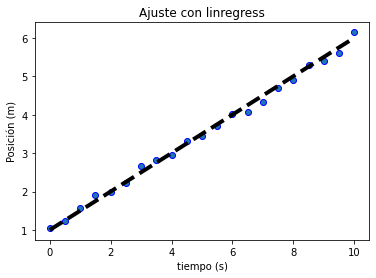

In [14]:
pos = stats.linregress(t,x)

t_min=t[0]
t_max=t[len(t)-1]


print(f"Pendiente: {pos.slope:.6f}",'\n')

print(f"Intercepto: {pos.intercept:.6f}",'\n')

print(f"R^2: {pos.rvalue**2:.6f},\n")


fig, ax = plt.subplots()
ax.scatter(t, x, edgecolors=(0, 0, 1))
ax.plot([0.,10.], [v0*t_min+x0,v0*t_max+x0], 'k--', lw=4)
plt.title('Ajuste con linregress')
ax.set_xlabel('tiempo (s)')
ax.set_ylabel('Posición (m)')
plt.show()

___________________________________________________________

# Cuarto Ajuste

* Biblioteca de ML *sklearn*
* sklearntiene dos funcionalidades para llevar a cabo el ajuste.
* Ambas funcionalidades requieren un reordenamiento de los datos

* Reordenamiento

In [15]:
tr=t.reshape(-1,1)
xr=x.reshape(-1,1)

### Primer enfoque

In [16]:
reg_1 = LinearRegression().fit(tr,xr)

print('Pendiente',reg_1.coef_,'\n')

print('Intercepto',reg_1.intercept_,'\n')

print('R^2',reg_1.score(tr,xr))

Pendiente [[0.48705426]] 

Intercepto [1.05539382] 

R^2 0.9963264302728575


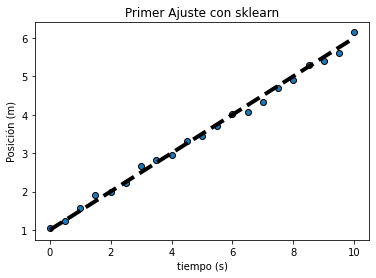

In [17]:
fig, bx = plt.subplots()
bx.scatter(tr, xr, edgecolors=(0, 0, 0))
bx.plot([0.,10.], [v0*t_min+x0,v0*t_max+x0], 'k--', lw=4)
plt.title('Primer Ajuste con sklearn')
bx.set_xlabel('tiempo (s)')
bx.set_ylabel('Posición (m)')
plt.show()

* Predicciones (extrapolaciones)

In [18]:
t_new=np.array([0.0,0.5,1.0])
t_new=t_new.reshape(-1,1)
extrapolacion=reg_1.predict(t_new)
print(extrapolacion)

[[1.05539382]
 [1.29892095]
 [1.54244808]]


### Segundo enfoque (ML)

* Definición de los conjuntos de entrenamiento y prueba

In [19]:
t_train=tr[:-10] # esto toma los primeros 11 elementos de t
t_test = tr[-10:] # esto toma el resto de la lista

x_train=xr[:-10]
x_test=xr[-10:]


* Modelo

In [20]:
regr = linear_model.LinearRegression()

# Entrenamiento

regr.fit(t_train,x_train)

# Predicciones

x_predict = regr.predict(t_test)


* Salida

In [21]:
print('Pendiente: \n', regr.coef_,'\n')

print('Intercepto: \n', regr.intercept_,'\n')

print('Error (incertidumbre) cuadrática media: %.2f'
      % mean_squared_error(x_test, x_predict),'\n')

# The coefficient of determination: 1 is perfect prediction
print('Coeficiente de determinación: %.2f'
      % r2_score(x_test, x_predict))

Pendiente: 
 [[0.49067877]] 

Intercepto: 
 [1.05982301] 

Mean squared error: 0.01 

Coefficient of determination: 0.98


__________________________________________________________________

## Notación explícita para el problema de ajuste lineal.

$$\begin{pmatrix}x^{(1)}\\x^{(2)}\\x^{(3)}\\\vdots\\x^{(N)}\end{pmatrix}=\begin{pmatrix}1&t^{(1)}\\
1&t^{(2)}\\\vdots&\vdots\\1&t^{(N)}\end{pmatrix}\begin{pmatrix}x_0\\v_0\end{pmatrix}$$

$$X=\begin{pmatrix}x^{(1)}\\x^{(2)}\\x^{(3)}\\\vdots\\x^{(N)}\end{pmatrix}\,,\qquad{}F=\begin{pmatrix}1&t^{(1)}\\
1&t^{(2)}\\1&t^{(3)}\\\vdots&\vdots\\1&t^{(N)}\end{pmatrix}$$

$$F^TF=\begin{pmatrix}1&1&1\dots&1\\t^{(1)}&t^{(2)}&t^{(3)}\dots&t^{(N)}\end{pmatrix}\begin{pmatrix}1&t^{(1)}\\
1&t^{(2)}\\1&t^{(3)}\\\vdots&\vdots\\1&t^{(N)}\end{pmatrix}=\begin{pmatrix}N&\sum{}t^{(i)}\\\sum{}t^{(i)}&\sum(t^{(i)})^2\end{pmatrix}$$

$$F^TX=\begin{pmatrix}1&1&1\dots&1\\t^{(1)}&t^{(2)}&t^{(3)}\dots&t^{(N)}\end{pmatrix}\begin{pmatrix}x^{(1)}\\x^{(2)}\\x^{(3)}\\\vdots\\x^{(N)}\end{pmatrix}=\begin{pmatrix}\sum{}x^{(i)}\\\sum{}t^{(i)}x^{(i)}\end{pmatrix}$$

* Parámetros a calcular

$$\Theta=\begin{pmatrix}x_0\\v_0\end{pmatrix}=\begin{pmatrix}\theta_0\\\theta_1\end{pmatrix}$$

* Solución

$$\boxed{\Theta=(F^TF)^{-1}\,M^TX}$$


 * Ejemplos (A FUTURO)

 https://www.scribbr.com/statistics/simple-linear-regression/


 https://towardsdatascience.com/linear-regression-with-example-8daf6205bd49